Sylwia Kwiatkowska, sprawozdanie 4

In [62]:
#zad 1
def lagrange(x, y):
    assert len(x) == len(y) != 0
    def f(n):
        sum = 0
        for i in range(len(x)):
            prod = 1
            for j in range(len(x)):
                if(i != j):
                    prod *= (n - x[j])/(x[i] - x[j])
            sum += y[i] * prod
        return sum
    return f

#test
print(lagrange([1,2,3],[1,4,9])(2))

4.0


In [3]:
#zad 2
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.interpolate as scp


#przygotowanie danych
f = lambda x: 1/(25*x**2 +1)
start = -2
end = 2
n = 21
x = np.arange(-2, 2, 0.01) #gęsta siatka

wezly_rownoodl = np.linspace(start, end, n)
#normalizacja do przedziału [-1;1] dla węzłów Czebyszewa
wezly_czebyszew = np.array([(start+end)/2 + ((end-start)/2) *math.cos(math.pi * (2*k+1) / (2*n)) for k in range(0, n)])


#polyfit: dostaje współrzędne i stopień, zwraca wektor współczynników wielomianu
#interp1d zwraca funkcję interpolującą
#poly1d dostaje współczynniki wielomianu, zwraca wielomian


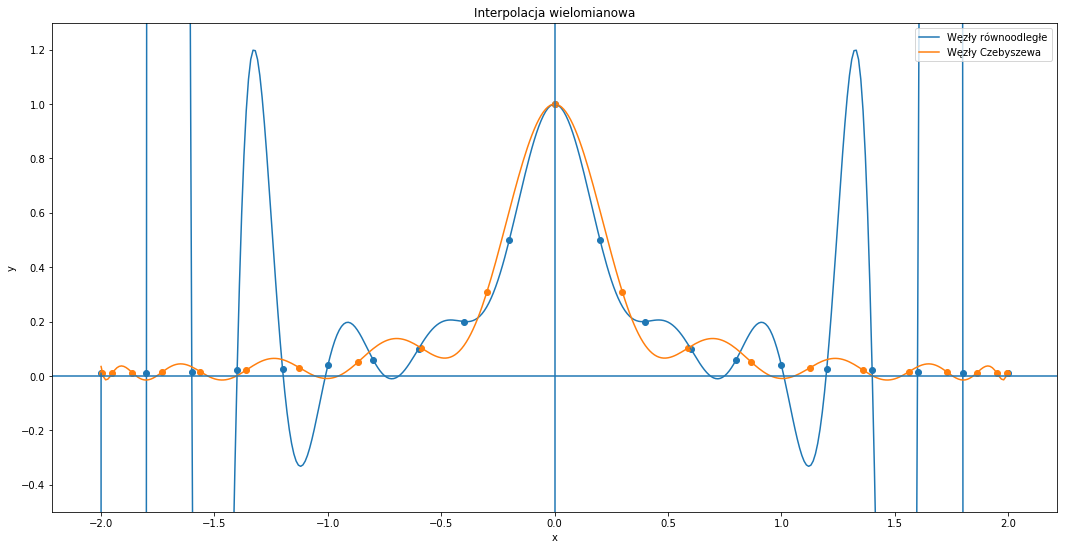

In [64]:
#interpolacja wielomianem

#funkcje interpolujące
wielom_rownoodl = np.poly1d(np.polyfit(wezly_rownoodl, f(wezly_rownoodl), deg=n-1)) 
#poly1d, ze współczynników otrzymanych jako resultat wywołania polyfit z podanymi współrzędnymi i stopniem, zwraca funkcję-wielomian
wielom_czebyszew  = np.poly1d(np.polyfit(wezly_czebyszew, f(wezly_czebyszew), deg=n-1))

#wartości funkcji interpolujących
rownoodl_y = wielom_rownoodl(x)
czebyszew_y = wielom_czebyszew(x)

plt.figure(figsize=(18,9))
plt.plot(x, rownoodl_y, label='Węzły równoodległe')
plt.plot(x, czebyszew_y, label='Węzły Czebyszewa')
#zaznaczenie węzłów na wykresie
plt.scatter(wezly_rownoodl, wielom_rownoodl(wezly_rownoodl))
plt.scatter(wezly_czebyszew, wielom_czebyszew(wezly_czebyszew))

plt.title('Interpolacja wielomianowa')
plt.xlabel('x')
plt.ylabel('y')
#osie
plt.axhline(0)
plt.axvline(0)
plt.legend()
plt.ylim(-0.5, 1.3)
plt.show()

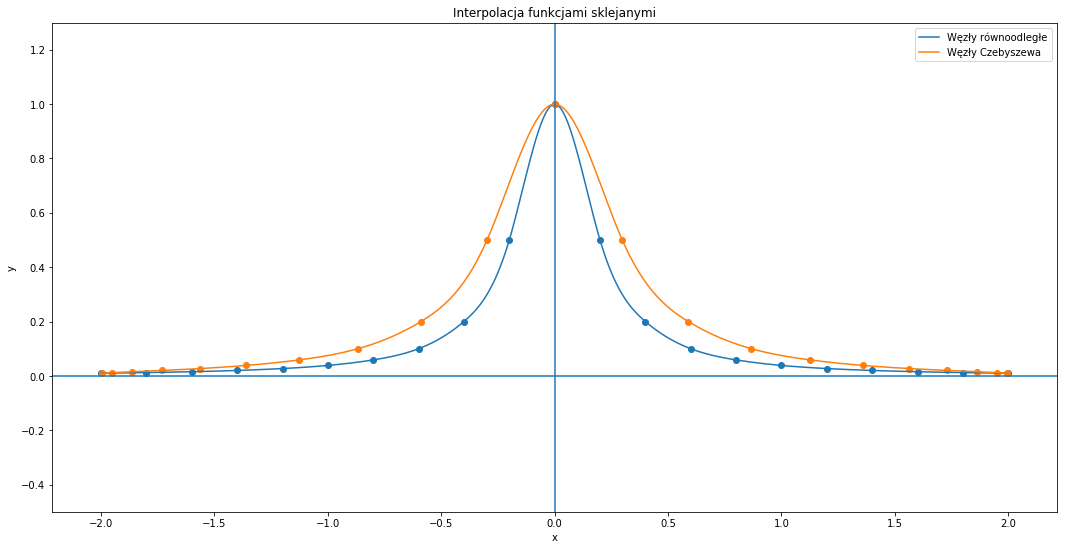

'\nMamy do czynienia z efektem Rungego, który występuje w przypadku węzłów równoogległych. \nPoczątkowo przybliżenie poprawia się, ale po dalszym wzroście pogarsza się, co jest szczególnie widoczne na końcach przedziału.\nAby tego uniknąć, stosuje się interpolację z węzłami Czebyszewa, gęściej upakowanymi na końcach przedziału.\nEfekt Rungego nie występuje przy interpolacji funkcjami sklejanymi, gdyż funkcja wynikowa składa się \nz funkcji interpolujących na mniejszych przedziałach, stąd rezultat jest dokładniejszy.\n'

In [65]:
#interpolacja f.sklejanymi 3.stopnia
#funkcje interpolujące
import scipy.interpolate as scp
sklej_rownoodl = scp.interp1d(wezly_rownoodl, f(wezly_rownoodl), 'cubic', fill_value='extrapolate')
sklej_czebyszew  = scp.interp1d(wezly_czebyszew, f(wezly_rownoodl), 'cubic', fill_value='extrapolate')

#wartości funkcji interpolujących
rownoodl_y_skl = sklej_rownoodl(x)
czebyszew_y_skl = sklej_czebyszew(x)

plt.figure(figsize=(18,9))
plt.plot(x, rownoodl_y_skl, label='Węzły równoodległe')
plt.plot(x, czebyszew_y_skl, label='Węzły Czebyszewa')
#zaznaczenie węzłów na wykresie
plt.scatter(wezly_rownoodl, sklej_rownoodl(wezly_rownoodl))
plt.scatter(wezly_czebyszew, sklej_czebyszew(wezly_czebyszew))

plt.title('Interpolacja funkcjami sklejanymi')
plt.xlabel('x')
plt.ylabel('y')
#osie
plt.axhline(0)
plt.axvline(0)
plt.legend()
plt.ylim(-0.5, 1.3)
plt.show()

"""
Mamy do czynienia z efektem Rungego, który występuje w przypadku węzłów równoogległych. 
Początkowo przybliżenie poprawia się, ale po dalszym wzroście pogarsza się, co jest szczególnie widoczne na końcach przedziału.
Aby tego uniknąć, stosuje się interpolację z węzłami Czebyszewa, gęściej upakowanymi na końcach przedziału.
Efekt Rungego nie występuje przy interpolacji funkcjami sklejanymi, gdyż funkcja wynikowa składa się 
z funkcji interpolujących na mniejszych przedziałach, stąd rezultat jest dokładniejszy.
"""

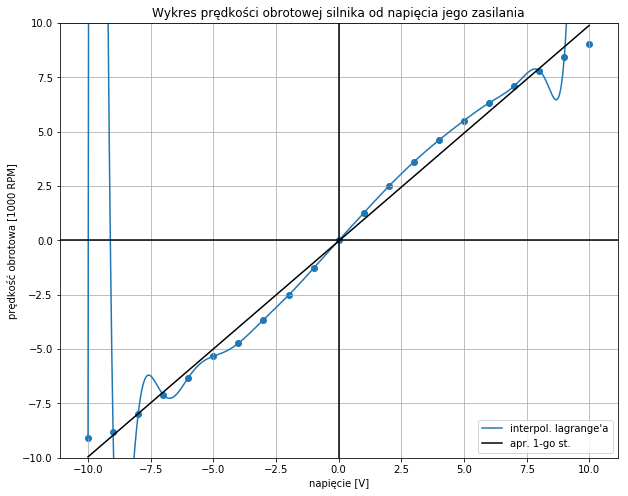

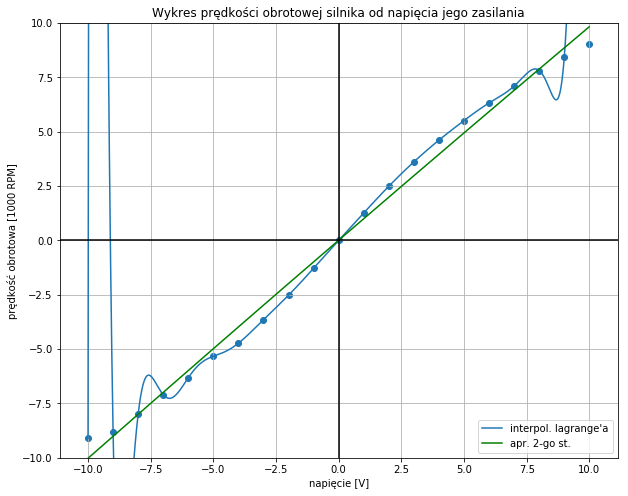

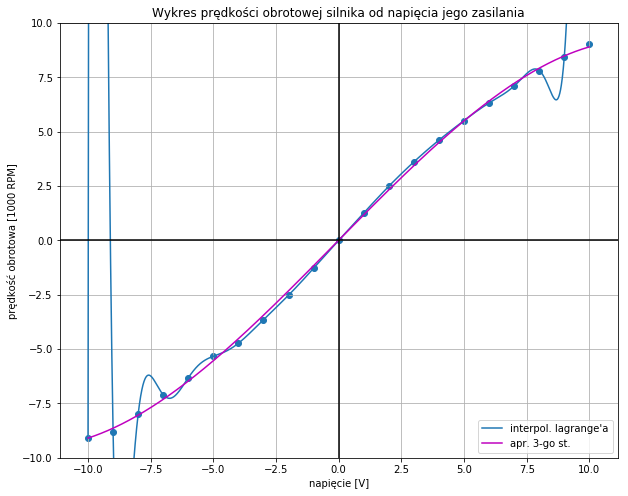

'\nW przypadku interpolacji wielomianowej mamy do czynienia z efektem Rungego, spowodowanym rozmieszczeniem węzłów w równych odstępach.\nAproksymacja wielomianem 1. stopnia daje najgorsze rezultaty (spośród trzech aproksymacji), \nwartości na krańcach przedziałów nie pokrywają się z wartościami w węzłach.\nAproksymacja wielomianem 2. stopnia pozwala na osiągnięcie trochę lepszych wyników, ale jeszcze dokładniejszy \nwynik daje użycie wielomianu stopnia trzeciego. Otrzymane wartości tylko nieznacznie odbiegają od wartości dla węzłów.\nW przypadku aproksymacji nie mamy do czynienia z efektem Rungego.\n'

In [66]:
#zad 3
x=np.array([x for x in range(-10, 11)])
y=[-9.10,-8.82,-7.99,-7.10,-6.32,-5.33,-4.73,-3.65,-2.52,-1.28,0.00,1.26,2.49,3.61,4.61,5.51,6.32,7.10,7.81,8.45,9.02]
x2 = np.arange(-10,10,0.01) #gęsta siatka

lagr = lagrange(x,y) #interpolacja wielomianowa
#aproksymacja wielomianami
apr1 = np.poly1d(np.polyfit(x,y,deg=1))
apr2 = np.poly1d(np.polyfit(x,y,deg=2))
apr3 = np.poly1d(np.polyfit(x,y,deg=3))



plt.figure(figsize=(10, 8))
plt.plot(x2,lagr(x2),label="interpol. lagrange'a")
plt.plot(x2,apr1(x2), 'k-',label='apr. 1-go st.')
plt.scatter(x,y)
plt.title('Wykres prędkości obrotowej silnika od napięcia jego zasilania')
plt.xlabel('napięcie [V]')
plt.ylabel('prędkość obrotowa [1000 RPM]')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(-10,10)
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(x2,lagr(x2),label="interpol. lagrange'a")
plt.plot(x2,apr2(x2), 'g-',label='apr. 2-go st.')
plt.scatter(x,y)
plt.title('Wykres prędkości obrotowej silnika od napięcia jego zasilania')
plt.xlabel('napięcie [V]')
plt.ylabel('prędkość obrotowa [1000 RPM]')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(-10,10)
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(x2,lagr(x2),label="interpol. lagrange'a")
plt.plot(x2,apr3(x2), 'm-',label='apr. 3-go st.')
plt.scatter(x,y)
plt.title('Wykres prędkości obrotowej silnika od napięcia jego zasilania')
plt.xlabel('napięcie [V]')
plt.ylabel('prędkość obrotowa [1000 RPM]')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(-10,10)
plt.show()

"""
W przypadku interpolacji wielomianowej mamy do czynienia z efektem Rungego, spowodowanym rozmieszczeniem węzłów w równych odstępach.
Aproksymacja wielomianem 1. stopnia daje najgorsze rezultaty (spośród trzech aproksymacji), 
wartości na krańcach przedziałów nie pokrywają się z wartościami w węzłach.
Aproksymacja wielomianem 2. stopnia pozwala na osiągnięcie trochę lepszych wyników, ale jeszcze dokładniejszy 
wynik daje użycie wielomianu stopnia trzeciego. Otrzymane wartości tylko nieznacznie odbiegają od wartości dla węzłów.
W przypadku aproksymacji nie mamy do czynienia z efektem Rungego.
"""

Czas:  2.2916950833167666 [s]
Prędkość:  21.6755580776678 [m/s]


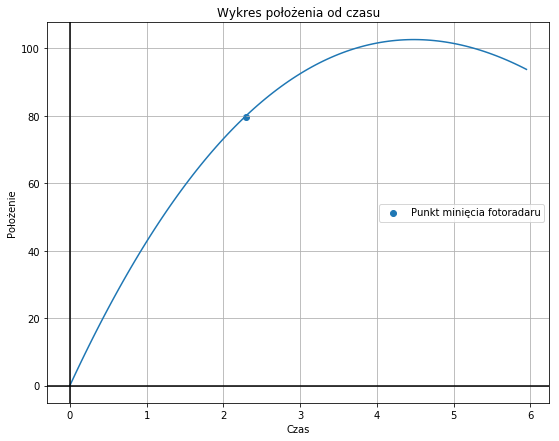

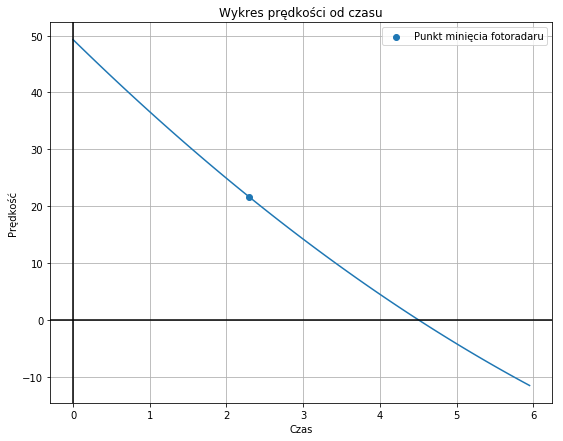

In [67]:
#zad 4
import scipy.misc as scpm

czas = [x for x in range(0, 4)]
polozenie = [0.0, 42.7, 73.2, 92.5]
szuk_pol = 79.6

szuk_czas = lagrange(polozenie, czas)(szuk_pol)
print("Czas: ", szuk_czas, "[s]")

szuk_predk = scpm.derivative(lagrange(czas, polozenie), x0=szuk_czas)
print("Prędkość: ", szuk_predk, "[m/s]")

x = np.arange(0, 6, 0.05)
plt.figure(figsize=(9,7))
plt.plot(x, lagrange(czas, polozenie)(x))
plt.title('Wykres położenia od czasu')
plt.xlabel('Czas')
plt.ylabel('Położenie')
plt.scatter(szuk_czas, szuk_pol, label="Punkt minięcia fotoradaru")
plt.legend()
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid()
plt.show()

plt.figure(figsize=(9,7))
plt.plot(x, scpm.derivative(lagrange(czas, polozenie), x))
plt.title('Wykres prędkości od czasu')
plt.xlabel('Czas')
plt.ylabel('Prędkość')
plt.scatter(szuk_czas, szuk_predk, label="Punkt minięcia fotoradaru")
plt.legend()
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid()
plt.show()

#lub obl s(t)-79.6=0 np metodą Newtona